In [1]:
from pathlib import Path
import pandas as pd
import time
import re
from sklearn.metrics import silhouette_score
from clustering import (get_clustering,
                        get_eigenvecs,
                        get_graph,
                        draw_clustering,
                        grid_find_params)

In [2]:
datapath = Path('data')
datafiles = list(datapath.glob('*.csv'))

In [3]:
def get_n_cluster_from_name(path: str) -> None | int:
    match = re.search(r"K=(\d+)", path)
    if match:
        return int(match.group()[2:])
    else:
        return None

Found fixed number of clusters: 7
max_cooridnates=2, n_clusters=7
D2-K=7 - score: 0.65
Computation time: 0.027785 seconds

Found fixed number of clusters: 12
max_cooridnates=12, n_clusters=12
D3-K=12 - score: 0.70
Computation time: 0.057464 seconds

max_cooridnates=14, n_clusters=15
D2-UNC - score: 0.77
Computation time: 0.199762 seconds

max_cooridnates=22, n_clusters=24
D1-UNC - score: 0.72
Computation time: 0.162874 seconds

Found fixed number of clusters: 2
max_cooridnates=2, n_clusters=2
D1-K=2 - score: 0.67
Computation time: 0.019066 seconds

max_cooridnates=10, n_clusters=9
D3-UNC - score: 0.60
Computation time: 0.082294 seconds



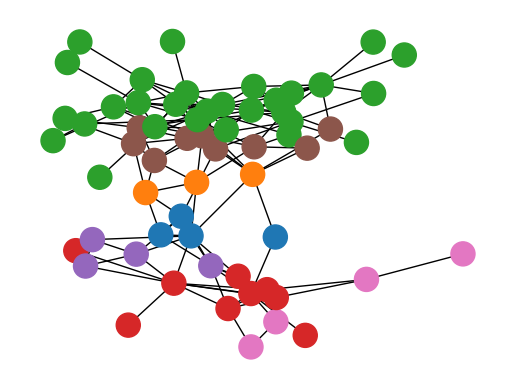

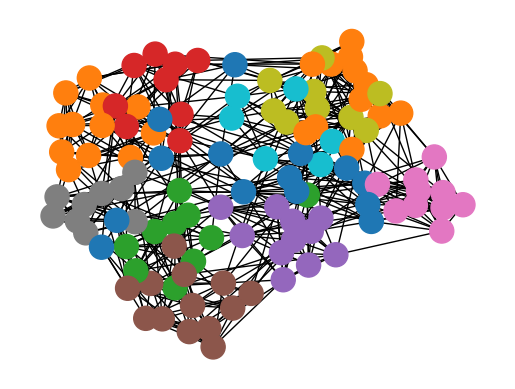

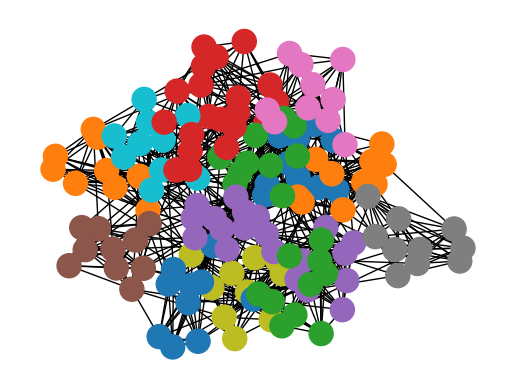

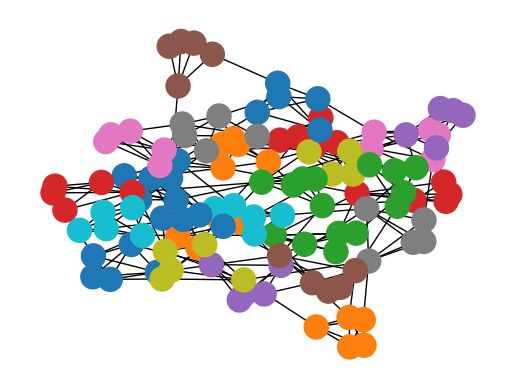

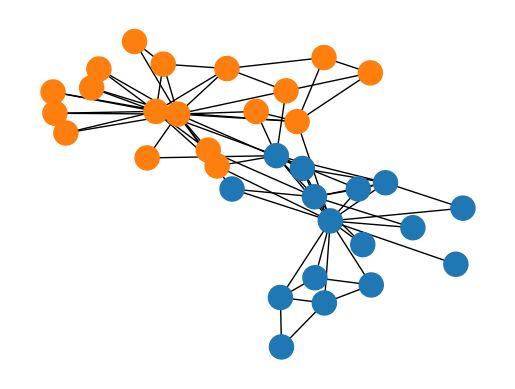

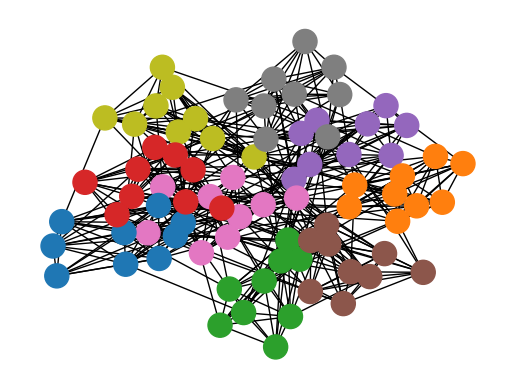

In [6]:
for datafile in datafiles:
    
    start_time = time.time()
    
    G, m = get_graph(datafile)
    eigen = get_eigenvecs(m)
        
    n_clusters = get_n_cluster_from_name(datafile.stem)
    if n_clusters:
        print(f'Found fixed number of clusters: {n_clusters}')
        cooridnates_grid = [i for i in range(2, 30)]
        clusters_grid = [n_clusters]
        score_name = 'calinski'
    else:
        clusters_grid = [i for i in range(2, 25)]
        score_name = 'silhouette'
        cooridnates_grid = [i for i in range(10, 25, 4)]
    
    max_cooridnates, n_clusters = grid_find_params(eigen, cooridnates_grid, clusters_grid)
    print(f"{max_cooridnates=}, {n_clusters=}")
    
    clustering = get_clustering(eigen[:,:max_cooridnates], n_clusters=n_clusters)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    draw_clustering(G, clustering)
    
    pd.DataFrame(clustering).reset_index().to_csv(f'PludowskiDawid_ZajkoAntoni/{datafile.stem}.csv', index=False, header=False)
    
    score = silhouette_score(eigen[:,:max_cooridnates], labels=clustering)
    print(f"{datafile.stem} - score: {score:.2f}")
    print(f"Computation time: {elapsed_time:.6f} seconds\n")